In [84]:

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ucl = pd.read_excel('UCL_playerstats_orig.xlsx')

#### ℹ️Info  Remove leading/trailing spaces from the 3rd row

In [67]:
ucl.iloc[19] = ucl.iloc[19].str.strip()

In [57]:
ucl[ucl['Player'] == 'Kylian Mbappe']['Team'].unique()

array(['Real Madrid'], dtype=object)

In [4]:
top_attackers = ucl[['Player','Team','Goals','Assists','Minutes_played']].sort_values(by='Goals', ascending=False).head(10).reset_index(drop=True)

In [5]:
print(top_attackers)

             Player             Team  Goals  Assists  Minutes_played
0          Raphinha        Barcelona     13        9            1225
1          Guirassy     BVB Dortmund     13        4            1084
2        Harry Kane    Bayern Munich     11        2            1120
3       Lewandowski        Barcelona     11        0             985
4  Lautaro Martinez            Inter      9        0             857
5       Vinicius Jr      Real Madrid      8        3            1104
6           Dembele         Paris SG      8        6            1163
7           Haaland  Manchester City      8        0             771
8          Pavlidis          Benfica      7        3             905
9     Kylian Mbappe     Real Madrid       7        2            1132


#### Boxplot: Rating sipas Position

In [6]:
fig_box = px.box(
    ucl,
    x="Position",
    y="Rating",
    color="Position",
    title="Player Rating Distribution by Position",
    labels={"Rating": "Player Rating", "Position": "Position"}
)
fig_box.update_layout(
    xaxis_tickangle=-45,
    showlegend=False,

)

fig_box.show()

In [7]:
fig_trend = px.scatter(
    ucl,
    x="Value10^6",
    y="Rating",
    title="Market Value vs Player Rating (with Trendline)",
    labels={"Value10^6": "Market Value 10^6€", "Rating": "Player Rating"}, # Ordinary Least Squares
)

fig_trend.show()

In [58]:
# Calculate the total number of teams in the dataet using groupby and nunique
total_teams_ucl = ucl.groupby('Team')['Team'].nunique().count()
total_teams_ucl

np.int64(31)

In [64]:
# Create a treemap
fig_treemap = px.treemap(
    ucl,
    path=['Team'],

    title='Teams in the Champions League 2025 - Tree Map'
)
fig_treemap.update_layout(margin=dict(l=0, r=0, b=0, t=30))
fig_treemap.show()

In [71]:
# Get the top 5 Teams with the best records of tackles won
top_teams_tackles = ucl.groupby('Team')['Tackles_Won'].sum().nlargest(5).reset_index()
top_teams_tackles

,Team,Tackles_Won
0,Paris SG,97.0
1,Inter,80.0
2,Benfica,63.0
3,Real Madrid,63.0
4,Barcelona,62.0


In [74]:
# Create a funnel chart for the top 5 teams
fig_funnel = px.funnel(top_teams_tackles,x='Tackles_Won',y='Team',title='Top 5 Teams with the Most Tackles Won in Champions League 2025',orientation='h',labels={'Tackles_Won':'Tackles Won'})
fig_funnel.show()


#### # Mean Total Goals per Phase_Tier - Heatmap

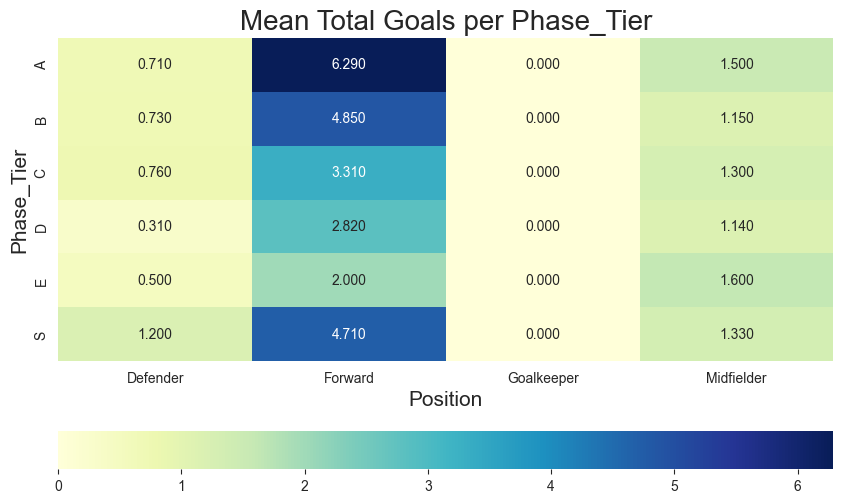

In [124]:
# Mean Total Goals per Phase_Tier
plt.figure(figsize=(10,6))
sns.heatmap(ucl.pivot_table(index='Phase_Tier', columns='Position', values='Goals', aggfunc='mean').round(2), annot=True, fmt=".3f", cmap="YlGnBu", cbar=True,
            cbar_kws={'orientation': 'horizontal'})
plt.title('Mean Total Goals per Phase_Tier', fontsize=20)
plt.xlabel('Position', fontsize=15)
plt.ylabel('Phase_Tier', fontsize=15)
plt.show()